In [64]:
import pandas as pd
import numpy as np

In [65]:
df = pd.read_csv('laptops.csv')

In [66]:
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [67]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [68]:
df = df[['ram','storage','screen','final_price']]
df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


# EDA 

#### Look at the final_price variable. Does it have a long tail?

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='final_price', ylabel='Count'>

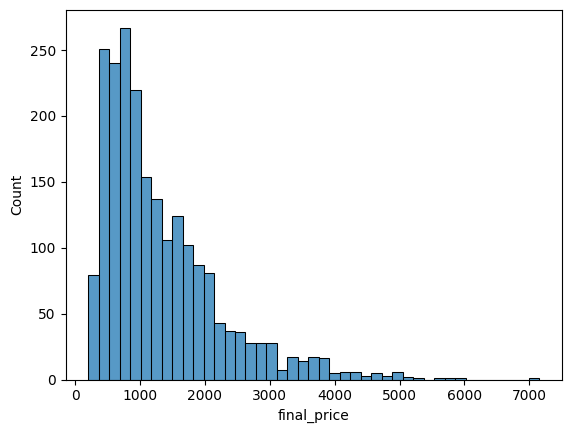

In [70]:
sns.histplot(df.final_price)

<Axes: xlabel='final_price', ylabel='Count'>

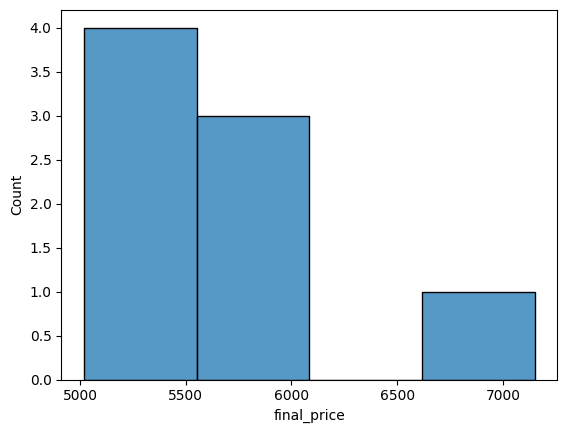

In [71]:
sns.histplot(df.final_price[df.final_price > 5000])

In [72]:
#No, it doesn't have a long tail since there are very few laptops priced above 5000.

#### Q1. There's one column with missing values. What is it?

In [73]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [74]:
#screen has missing values

#### Q2. What's the median (50% percentile) for variable 'ram'?

In [75]:
df.ram.median()

np.float64(16.0)

In [76]:
# 16 is the median of the variable ram

# Prepare and split the dataset

In [77]:
n = df.shape[0]
n_val = int(n *0.2)
n_test = int(n* 0.2)
n_train = n - n_val - n_test

In [78]:
idx = np.arange(n)
idx

array([   0,    1,    2, ..., 2157, 2158, 2159])

In [79]:
np.random.seed(42)
np.random.shuffle(idx)

In [80]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
# final price train
final_price_train = df_train.final_price
# final price val
final_price_val = df_val.final_price

# Q3

#### Calculate mean of train dataset

In [81]:
mean_train = df_train.screen.mean()
mean_train

np.float64(15.163534416086618)

#### Calculate mean of validation dataset

In [82]:
mean_val = df_val.screen.mean()
mean_val

np.float64(15.149883990719259)

In [83]:
def prepare_X(X, fillna_value):
    X = X.fillna(fillna_value)
    X =  np.delete(X, 3, axis = 1)
    return X
def linear_regression(X,Y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)     
    return XTX_inv.dot(X.T).dot(Y).reshape(-1,1)  
def predict_Y(X,W):
    return W[0]+X.dot(W[1:])
def RMSE(Y_train, Y):
    error = Y_train - Y
    mse = (error ** 2).mean()
    return round(np.sqrt(mse),2)

#### with 0

In [84]:
df_train_zero = prepare_X(df_train,0)
df_val_zero = prepare_X(df_val,0)
#train using linear regression with 0
W_zero = linear_regression(df_train_zero,final_price_train)
#predict for validation dataset for zero 
predicted_y_zero_val = predict_Y(df_val_zero,W_zero)
#calculat RMSE zero val
RMSE(np.array(predicted_y_zero_val),np.array(final_price_val))


np.float64(1082.4)

#### with mean

In [85]:
df_train_mean = prepare_X(df_train,mean_train)
df_val_mean  = prepare_X(df_val,mean_val)
#train using linear regression with mean
W_mean = linear_regression(df_train_mean,final_price_train)
#predict for validation dataset for mean 
predicted_y_mean_val = predict_Y(df_val_mean,W_mean)
#calculat RMSE mean val
RMSE(np.array(predicted_y_mean_val),np.array(final_price_val))

np.float64(1082.13)

#### RMSE gives better RMSE

# Q4 train regularized linear regression

In [86]:
def linear_regression_regularized(X,Y,r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    REG_XTX = XTX+r*np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(REG_XTX)     
    return XTX_inv.dot(X.T).dot(Y).reshape(-1,1)

In [87]:
reg_arr = [0, 0.01, 0.1, 1, 5, 10, 100]
for i in reg_arr:
    W = linear_regression_regularized(df_train_zero,final_price_train,i)   
    Y = predict_Y(df_val_zero, W)
    print(RMSE(np.array(Y),np.array(final_price_val)))

1082.4
1082.4
1082.42
1082.59
1083.23
1083.79
1085.6


#### 0 and 0.01 gives best RMSE

# Q5 train with different seed

In [88]:
seed_arr = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
RMSE_arr =[]

for i in seed_arr:    
    np.random.seed(i)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    # final price
    final_price_train = df_train.final_price
    final_price_val = df_val.final_price

    df_train_zero = prepare_X(df_train,0)
    df_val_zero = prepare_X(df_val,0)
    
    
    W_zero = linear_regression(df_train_zero,final_price_train)
    predicted_y_zero_val = predict_Y(df_val_zero,W_zero)
    RMSE_val = RMSE(np.array(predicted_y_zero_val),np.array(final_price_val))
    RMSE_arr.append(RMSE_val)
    print(RMSE_val)
   

1155.36
1096.82
1161.51
1085.81
1187.34
1197.86
1164.55
1227.92
1149.69
1184.22


In [90]:
std = np.std(RMSE_arr)
round(std, 3)

np.float64(41.249)

#### The value of std is near to 39.176

# Q6 

In [92]:
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
df_full_train = pd.concat([df_train,df_val])

# final price
final_price_train = df_full_train.final_price
final_price_test = df_test.final_price

df_train_zero = prepare_X(df_full_train,0)
df_test_zero = prepare_X(df_test,0)

W_zero = linear_regression(df_train_zero,final_price_train)
predicted_y_zero_test = predict_Y(df_test_zero,W_zero)
RMSE(np.array(predicted_y_zero_test),np.array(final_price_test))

np.float64(1088.99)